# 小批量随机梯度下降 (Minibatch Stochastic Gradient Descent) 解释

小批量随机梯度下降（Minibatch Stochastic Gradient Descent，简称 Minibatch SGD）是一种介于全批量梯度下降（Batch Gradient Descent）和随机梯度下降（Stochastic Gradient Descent，简称 SGD）之间的优化算法。它综合了两者的优点，通过每次迭代使用一个小批量样本来更新模型参数，这种方法既能降低计算成本，又能保持一定程度的随机性来避免陷入局部最优。

### 小批量随机梯度下降与随机梯度下降的区别

- **随机梯度下降**（SGD）每次迭代使用一个样本来计算梯度并更新参数。这种方法的计算效率很高，但更新路径波动较大，收敛过程可能较为嘈杂。
- **小批量随机梯度下降**（Minibatch SGD）每次迭代使用一个小批量（通常几十到几百个）的样本来计算梯度。这种方法平衡了计算效率和参数更新的稳定性，通常可以更快地收敛，并在实践中被广泛使用。
- **全批量梯度下降**每次迭代使用整个数据集来计算梯度，虽然方向最为准确，但计算成本高，特别是在大数据集上几乎不可行。

### 公式解释

在小批量随机梯度下降中，参数更新的数学公式如下：

#### 对于权重 $\mathbf{w}$ 的更新：

$$
\mathbf{w} \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b)
$$

#### 对于偏置 $b$ 的更新：

$$
b \leftarrow b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b)
$$

- $\mathbf{w}$ 和 $\mathbf{x}^{(i)}$ 都是向量。
- $\eta$ 是学习率，控制了梯度下降的步长。
- $|\mathcal{B}|$ 是小批量的大小，表示每次迭代中用于计算梯度的样本数量。
- $\mathcal{B}_t$ 代表在第 $t$ 次迭代中随机选择的小批量样本。
- $\partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b)$ 和 $\partial_b l^{(i)}(\mathbf{w}, b)$ 分别是损失函数关于权重和偏置的偏导数。

这些公式显示了如何根据小批量中的样本计算平均梯度，并使用这个梯度来更新模型参数。这种更新策略不仅减少了内存占用（因为不需要存储整个数据集的梯度），而且由于引入了随机性，有助于模型跳出局部最小值，寻找更全局的最小值解。



### 扩展权重向量和输入特征向量
当将偏置 $b$ 纳入权重向量 $\mathbf{w}$ 中时，我们可以简化模型表示和更新公式。在这种情况下，我们扩展权重向量和输入特征向量，使权重向量包括偏置作为其一个额外的维度，并在每个输入特征向量中添加一个恒定为1的元素。这样，模型的线性预测部分可以仅通过一个点积（向量乘法）来表示。假设原始权重向量为 $\mathbf{w}$，并且包含 $d$ 个特征的权重。扩展后的权重向量 $\mathbf{w}'$ 将变为 $(d+1)$ 维，其中最后一个元素代表偏置 $b$。

#### 更新公式
$$
\mathbf{w}' \leftarrow \mathbf{w}' - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}'} l^{(i)}(\mathbf{w}', \mathbf{x}'^{(i)})
$$

其中，$\partial_{\mathbf{w}'} l^{(i)}(\mathbf{w}', \mathbf{x}'^{(i)})$ 是损失函数关于扩展后的权重向量 $\mathbf{w}'$ 的梯度，这包括了对偏置 $b$ 的梯度计算。

#### 具体梯度表达式

对于以MSE为损失函数的模型，此梯度表达式可以具体写成：

$$
\mathbf{w}' \leftarrow \mathbf{w}' - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}'^{(i)} \left((\mathbf{w}'^\top \mathbf{x}'^{(i)}) - y^{(i)}\right)
$$
- 其中:
    - $\sum_{i \in \mathcal{B}_t} \mathbf{x}'^{(i)} \left((\mathbf{w}'^\top \mathbf{x}'^{(i)}) - y^{(i)}\right)$  
      代表了在小批量 $\mathcal{B}_t$ 中所有样本对权重 $\mathbf{w}'$ 的偏导数（梯度）的累加。这里的 $\mathbf{w}'$ 包括了偏置项作为其组成部分，而 $\mathbf{x}'^{(i)}$ 同样包括了一个恒定的 1 作为特征来对应偏置项，使得模型能够通过单一的线性模型表达式来计算预测值。
    - $\mathbf{x}'^{(i)}$ 是扩展的特征向量，包括原始特征和一个额外的常数项 1（对应偏置项）。
    - $\mathbf{w}'$ 是扩展的权重向量，包括传统的权重和偏置项 $b$。
    - $\mathbf{x}'^{(i)} \left((\mathbf{w}'^\top \mathbf{x}'^{(i)}) - y^{(i)}\right)$ 计算了损失函数关于权重 $\mathbf{w}'$ 的梯度。它实际上是损失函数在第 $i$ 个样本上对每个权重分量的偏导数的向量表示。
    - $\frac{\eta}{|\mathcal{B}_t|}$ 是一个标准化因子，确保无论小批量的大小如何，学习步长的大小都是适当的。通过这种方式，更新不会对小批量的具体大小过度敏感，从而使模型更新更加平滑和稳定。


In [137]:
import numpy as np

# 随机数据数量
num_of_data = 20000
# 设置随机种子
np.random.seed(0)

# 生成数据
x_value = np.random.rand(num_of_data, 2)
y_value = 4 * x_value[:, 0] + 1 * x_value[:, 1] + np.random.randn(num_of_data)  # 增加随机噪声

# 添加偏置项 (全1列)
# x_value = np.hstack((x_value, np.ones((x_value.shape[0], 1))))  # 增加偏置项

# 初始化权重向量
# w = np.random.randn(3)  # 包括两个特征权重和一个偏置
w = np.random.randn(2)  # 包括两个特征权重和一个偏置


# 损失函数：均方误差
def mse_loss(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    loss = (1 / n) * np.sum(0.5 * (y_pred - y) ** 2)
    return loss


# 梯度计算
def gradient(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    grad = (1 / n) * x.T.dot(y_pred - y)
    return grad


# 设置迭代次数
iterations = 100

# 设置初始学习率
initial_learning_rate = 0.99
learning_rate = initial_learning_rate
# 设置最小学习率
min_learning_rate = 0.1
# 衰减率
decay_rate = 0.5

# 储存每次迭代的权重
weight_history = []

# 设置初始样本大小
initial_batch_size = 100
# 设置在最后N个迭代开始增加样本大小
N = iterations // 10
# 最大样本大小
max_batch_size = num_of_data
# 计算批量大小的增加步长
step_size = (max_batch_size - initial_batch_size) / N

# 执行小批量随机梯度下降
for i in range(iterations):
    if i > iterations - N:
        batch_size = int(initial_batch_size + (i - (iterations - N)) * step_size)
    else:
        batch_size = initial_batch_size
        
    # 计算当前学习率
    learning_rate = max(min_learning_rate, learning_rate - (initial_learning_rate - min_learning_rate) / iterations)

    # 随机抽取小批量样本
    indices = np.random.choice(len(x_value), batch_size, replace=False)
    x_batch = x_value[indices]
    y_batch = y_value[indices]

    # 计算梯度
    grad = gradient(x_batch, y_batch, w)

    # 更新权重
    w -= learning_rate * grad

    # 每隔一定迭代次数打印损失值
    if i % 10 == 0:
        loss = mse_loss(x_value, y_value, w)
        print(f"Iteration {i}, lr {learning_rate}: Loss = {loss:.4f}")
    weight_history.append(w.copy())

# 打印最终的权重
weight_history[-1]

Iteration 0, lr 0.9811: Loss = 2.2573
Iteration 10, lr 0.8920999999999998: Loss = 0.5395
Iteration 20, lr 0.8030999999999996: Loss = 0.5092
Iteration 30, lr 0.7140999999999994: Loss = 0.5029
Iteration 40, lr 0.6250999999999992: Loss = 0.5013
Iteration 50, lr 0.536099999999999: Loss = 0.5057
Iteration 60, lr 0.44709999999999883: Loss = 0.5011
Iteration 70, lr 0.35809999999999864: Loss = 0.5008
Iteration 80, lr 0.26909999999999845: Loss = 0.5008
Iteration 90, lr 0.18009999999999848: Loss = 0.5008


array([3.96660135, 1.04836867])

In [138]:
# 使用 np.linalg.lstsq() 函数求解最小二乘法进行数据对比
w_np, _, _, _ = np.linalg.lstsq(x_value, y_value, rcond=None)
w_np

array([3.9914596 , 1.00504097])

In [139]:
# 计算最小二乘法的损失
mse_loss(x_value, y_value, w_np)

0.5005136498466582

批量梯度下降耗时:  0.31515026092529297
最终权重:  [3.98751357 1.00494004]
最小损失:  0.5005163110623903
解析解权重:  [3.9914596  1.00504097]
解析解损失:  0.5005136498466582


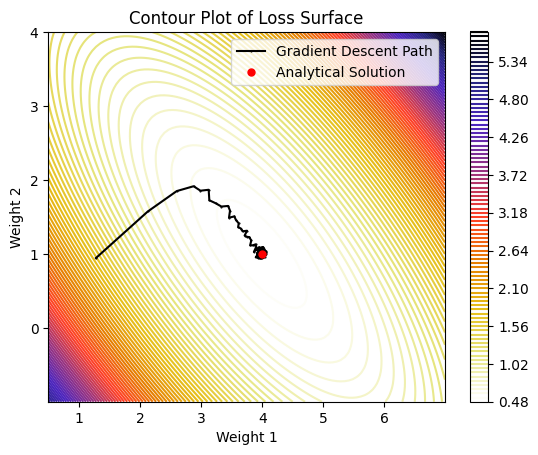

In [141]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# 随机数据数量
num_of_data = 20000
# 设置随机种子
np.random.seed(0)

# 生成数据
x_value = np.random.rand(num_of_data, 2)
# 给定一个拟合的y值
y_value = 4 * x_value[:, 0] + 1 * x_value[:, 1] + np.random.randn(num_of_data)  # 增加随机噪声


# 损失函数：均方误差
def mse_loss(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    loss = (1 / n) * np.sum(0.5 * (y_pred - y) ** 2)
    return loss


# 定义梯度计算函数
def gradients(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    the_dw = (1 / n) * np.dot(x.T, (y_pred - y))  # 梯度
    return the_dw


# 设置迭代次数
iterations = 1000
# 初始化权重向量
w = np.random.randn(2)
# 设置初始学习率
initial_learning_rate = 0.99
learning_rate = initial_learning_rate
# 设置最小学习率
min_learning_rate = 0.01
# 储存每次迭代的权重
weight_history = []
# 设置样本大小
batch_size = 600

# 初始化小批量样本
x_batch = np.zeros((batch_size, 2))
y_batch = np.zeros(batch_size)
# 初始化索引列表
indices_list = list(range(len(x_value)))

# 执行小批量随机梯度下降
s_t = time.time()
for i in range(iterations):
    # 计算当前学习率
    learning_rate = max(min_learning_rate, learning_rate - (initial_learning_rate - min_learning_rate) / iterations)
    # 随机抽取小批量样本
    indices = random.sample(indices_list, batch_size)
    x_batch = x_value[indices]
    y_batch = y_value[indices]
    # 计算梯度
    dw = gradients(x_batch, y_batch, w)
    # 更新权重
    w -= learning_rate * dw
    # 记录权重
    weight_history.append(w.copy())

print('批量梯度下降耗时: ', time.time() - s_t)
print('最终权重: ', w)
print('最小损失: ', mse_loss(x_value, y_value, w))

'''用 np.linalg 计算线性回归的解析解'''
w_np, _, _, _ = np.linalg.lstsq(x_value, y_value, rcond=None)
print('解析解权重: ', w_np)
print('解析解损失: ', mse_loss(x_value, y_value, w_np))

'''生成损失曲面等高线2D'''
w1 = np.linspace(w_np[0] - 3.5, w_np[0] + 3, 100)
w2 = np.linspace(w_np[1] - 2, w_np[1] + 3, 100)
w1, w2 = np.meshgrid(w1, w2)
losses = np.zeros_like(w1)

# 计算网格上每点的损失
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        weight = np.array([w1[i, j], w2[i, j]])
        losses[i, j] = mse_loss(x_value, y_value, weight)

# 绘制等高线图
fig, ax = plt.subplots()
CS = ax.contour(w1, w2, losses, 100, cmap='CMRmap_r')  # 生成100层等高线
plt.colorbar(CS)

# 绘制梯度下降路径
path = np.array(weight_history)
ax.plot(path[:, 0], path[:, 1], label='Gradient Descent Path', color='black', marker='.', linestyle='-', markersize=1)

# 标记解析解位置
ax.plot([w_np[0]], [w_np[1]], 'ro', markersize=5, label='Analytical Solution')

# 设置图例和标签
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_title('Contour Plot of Loss Surface')
ax.legend()
plt.show()